In [2]:
import bangumi_request as br
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
data = br.get_all_collections(username = "wakakap", subject_type=2, type=2, offsetmax=1151)

当前偏移量: 0
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=0
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 50
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=50
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 100
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=100
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 150
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=150
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 200
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=200
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 250
使用的用户名: wakakap
请求URL: https://api.bgm.tv/v0/users/wakakap/collections
请求参数: subject_type=2, type=2, limit=50, offset=250
响应状态码: 200
获取到的数据量: 4
实际数据量: 50
当前偏移量: 300
使用的用户

In [3]:
# 保存 json 文件
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
with open(file_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [4]:
def print_entry_info(entry):
    updated_at = entry.get('updated_at', 'N/A')
    comment = entry.get('comment', 'N/A')
    rate = entry.get('rate', 'N/A')
    tags = entry.get('tags', 'N/A')
    # subject
    subject = entry.get('subject', {})
    subject_name = subject.get('name', 'N/A')
    subject_score = subject.get('score', 'N/A')
    subject_tags = subject.get('tags', [])
    
    print(f"收藏时间: {updated_at}")
    print(f"作品名称: {subject_name}")
    print(f"我的评分: {rate}")
    print(f"网站评分: {subject_score}")
    print(f"评论: {comment}")
    # 获取前5个tag的name
    tag_names = ', '.join(tags)
    subject_tag_names = ', '.join([tag['name'] for tag in subject_tags[:5]])
    print(f"我的标签: {tag_names}")
    print(f"标签: {subject_tag_names}")

def print_basic_info(file_path, num_entries=3):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # 打印数据个数
    print(f"共有 {len(data)} 条数据")
    
    # 打印前 num_entries 条数据
    print(f"前 {num_entries} 条数据:")
    for entry in data[:num_entries]:
        print_entry_info(entry)
        print(f"---------")
    print(f".........")
    # 打印最后 num_entries 条数据
    print(f"最后 {num_entries} 条数据:")
    for entry in data[-num_entries:]:
        print_entry_info(entry)
        print(f"---")

print_basic_info(file_path, num_entries=2)

共有 1138 条数据
前 2 条数据:
收藏时间: 2025-01-12T17:40:48+08:00
作品名称: 薬屋のひとりごと
我的评分: 8
网站评分: 7.4
评论: 讨厌宫廷剧一直没看，补了真棒。独树一帜的题材。吸引人的剧情。但这青楼老鸨的诸多做法很迷，没解释清楚是唯一的缺点，有机会考虑下小说。
我的标签: 2023, 悠木碧
标签: 2023年10月, 轻小说改, 推理, TV, 悠木碧
---------
收藏时间: 2025-01-06T23:03:40+08:00
作品名称: BURN THE WITCH
我的评分: 6
网站评分: 7.2
评论: netflix刷到的，看了。像个广告片。
我的标签: 剧场版, 2020, StudioColorido
标签: 剧场版, StudioColorido, 漫画改, 奇幻, 2020
---------
.........
最后 2 条数据:
收藏时间: 2018-01-01T02:39:34+08:00
作品名称: Just Because!
我的评分: 7
网站评分: 7.3
评论: 虽然作画中偏下，但叙事很舒服，也很有代入感的青春恋爱。
我的标签: 2017, 小林敦, 原创, PINEJAM, 礒部花凜, 芳野由奈, Lynn, 千本木彩花, 貫井柚佳, 櫻庭有紗
标签: 恋爱, 原创, 校园, 2017年10月, 鸭志田一
---
收藏时间: 2018-01-01T02:38:54+08:00
作品名称: 宝石の国
我的评分: 8
网站评分: 7.7
评论: None
我的标签: 2017, 京極尚彦, 黒沢ともよ, 小松未可子, 茅野愛衣, 佐倉綾音, 田村睦心, 早見沙織, 内山夕実, 高垣彩陽, 内田真礼, 伊藤かな恵, 小澤亜李, 種﨑敦美, 茜屋日海夏, 広橋涼, 皆川純子, 能登麻美子, 釘宮理恵, 桑島法子, 原田彩楓, 上田麗奈, 斎藤千和, 三瓶由布子, 伊瀬茉莉也, 朴璐美, M・A・O
标签: 漫画改, 3D, 2017年10月, 奇幻, TV
---


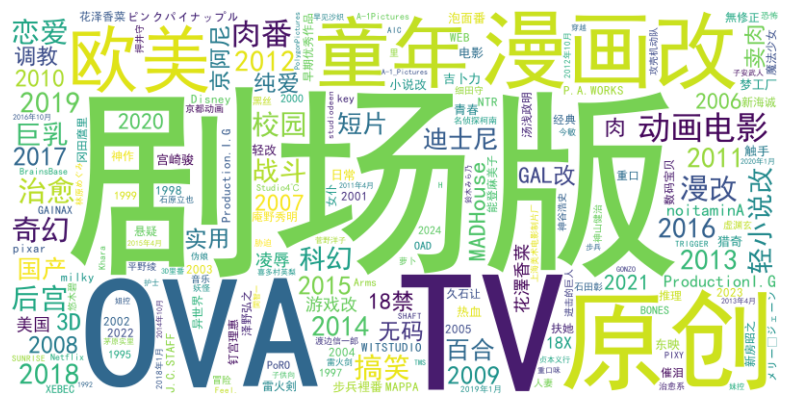

In [6]:
file_path = 'bangumi/anime_seen/collections_seenanime_data.json'
def filter_tags(tags, filter_list, include=False):
    if include:
        return [tag for tag in tags if tag in filter_list]
    else:
        return [tag for tag in tags if tag not in filter_list]

def count_tags(file_path, filter_list=None, include=False):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    sumtags = []
    for entry in data:
        tags = entry.get('tags', 'N/A')
        # subject
        subject = entry.get('subject', {})
        subject_tags = subject.get('tags', [])
        if filter_list is not None:
            tags = filter_tags(tags, filter_list, include)
            subject_tags = filter_tags([tag['name'] for tag in subject_tags], filter_list, include)
        sumtags.extend(tags)
        sumtags.extend(subject_tags)
    # 统计词频
    tag_counts = pd.Series(sumtags)
    return tag_counts

def cloud(file_path, filter_list=None, include=False):
    tag_counts = count_tags(file_path, filter_list, include)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='simhei.ttf').generate_from_frequencies(tag_counts.value_counts().to_dict())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 使用过滤列表生成词云
filter_list = ["里番"]
cloud(file_path, filter_list)